In [51]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [52]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

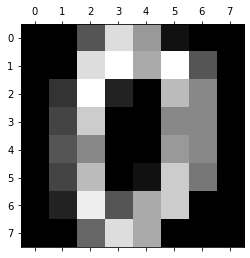

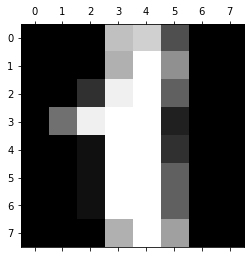

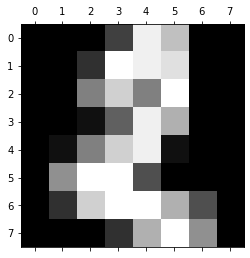

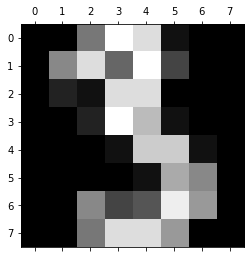

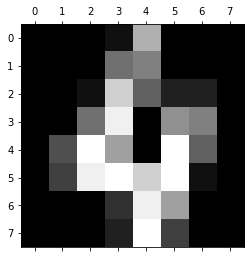

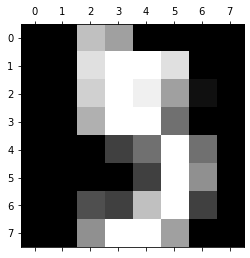

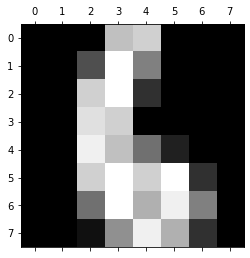

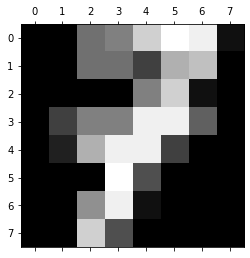

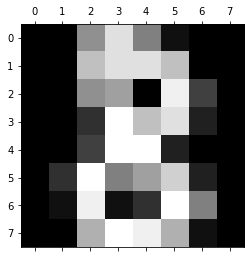

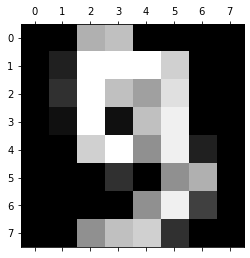

In [53]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [54]:
df = pd.DataFrame(digits.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [55]:
df['target'] = digits.target

In [56]:
X = df.drop('target',axis='columns')
y = df.target

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
model.score(X_test, y_test)

0.9611111111111111

In [60]:
y_predicted = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  1,  1,  1,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  0,  2,  1,  0,  1,  4,  0],
       [ 0,  2, 35,  1,  1,  0,  0,  0,  2,  1],
       [ 0,  2,  0, 20,  0,  0,  0,  0,  6,  1],
       [ 0,  3,  2,  0, 33,  1,  3,  1,  1,  1],
       [ 0,  0,  0,  2,  0, 18,  2,  1,  2,  5],
       [ 2,  1,  1,  0,  3,  2, 23,  3,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  1, 24,  1,  1],
       [ 0,  3,  4,  2,  0,  4,  3,  0, 18,  2],
       [ 0,  0,  0,  2,  0,  2,  0,  2,  4, 23]], dtype=int64)

Text(69.0, 0.5, 'Truth')

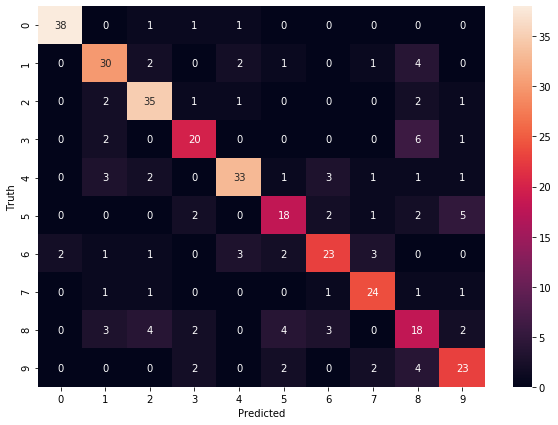

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')